In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from tqdm import tqdm

In [116]:
omega_m , chi2 = np.load("/Users/matteocicirello/Desktop/astrocosmolib/test/chi2_values.npy")

In [117]:
interp_chi2 = interp1d(omega_m, chi2, kind='cubic')

In [118]:
def MCMC(x0 , n_steps, x_min , x:max):
    """
    MCMC function to sample the posterior distribution of a parameter.
    
    Parameters:
    x0 : float
        Initial guess for the parameter.
    nsteps : int
        Number of steps to take in the MCMC chain.
    x_min : float
        Minimum value for the parameter.
    x_max : float
        Maximum value for the parameter.
    
    Returns:
    samples : list
        List of sampled values for the parameter.
    """
    
    chain = []
    acceptance = []
    chi2_chain = []

    chain.append(x0)
    acceptance.append(True)
    chi2_chain.append(interp_chi2(x0))

    
    for i in tqdm(range(n_steps)):
        # Propose a new value for the parameter
        x_try = np.random.uniform(x_min, x_max)
        
        # Calculate the chi2 value for the proposed value
        f_try = interp_chi2(x_try)
        f_old = chi2_chain[-1]

        log_ratio = f_old - f_try
        log_u = np.log(np.random.uniform())

        if log_u < log_ratio:
            # Accept the new value
            chain.append(x_try)
            chi2_chain.append(f_try)
            acceptance.append(True)
        else:
            # Reject the new value
            chain.append(chain[-1])
            chi2_chain.append(chi2_chain[-1])
            acceptance.append(False)

    
    return chain, chi2_chain, acceptance

In [119]:
x_min = 0.23
x_max = 0.37
n_steps = 100000
x0 = 0.26
chain , chi2_chain , acceptance = MCMC(x0, n_steps, x_min, x_max)


  3%|▎         | 2697/100000 [00:00<00:07, 13466.89it/s]

100%|██████████| 100000/100000 [00:07<00:00, 13686.17it/s]


In [120]:
print("Acceptance rate: ", np.sum(acceptance))

Acceptance rate:  14161


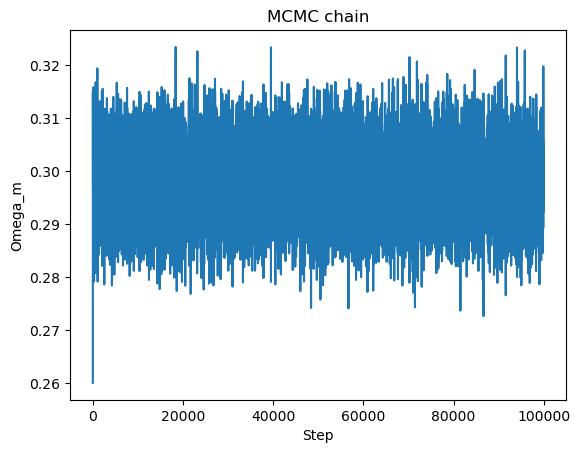

In [121]:
plt.plot(range(len(chain)), chain)
plt.xlabel("Step")
plt.ylabel("Omega_m")
plt.title("MCMC chain")
plt.show()

In [122]:
print("omega_m : {mean:2.4f} +/- {std:2.4f}".format(mean = np.mean(chain[:10000]), std = np.std(chain[:10000])))

omega_m : 0.2978 +/- 0.0061
